In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# import data 
train_data = pd.read_csv('Train (2).csv')
test_data = pd.read_csv('Test (2).csv')

In [63]:
test_data.shape


(10086, 12)

In [64]:
train_data.shape

(23524, 13)

In [65]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [66]:
train_data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [68]:
train_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

<Axes: >

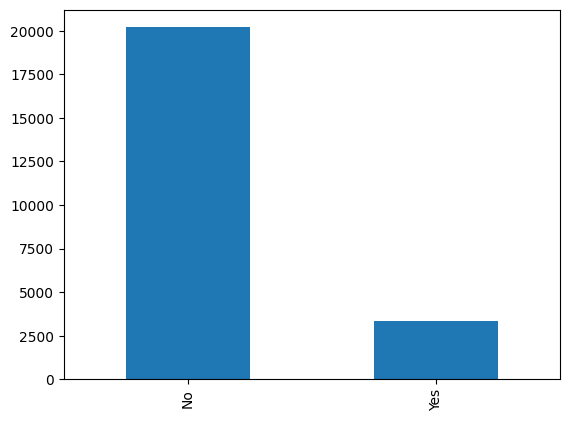

In [69]:
train_data.bank_account.value_counts().plot(kind='bar')

In [85]:
from sklearn.preprocessing import LabelEncoder
#conver target lable to numerical
le = LabelEncoder()
train_data['bank_account'] = le.fit_transform(train_data['bank_account'])
train_data.head() 

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,country_,year_
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Kenya,2018
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Kenya,2018
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Kenya,2018
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,Kenya,2018
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,Kenya,2018


<Axes: xlabel='job_type', ylabel='count'>

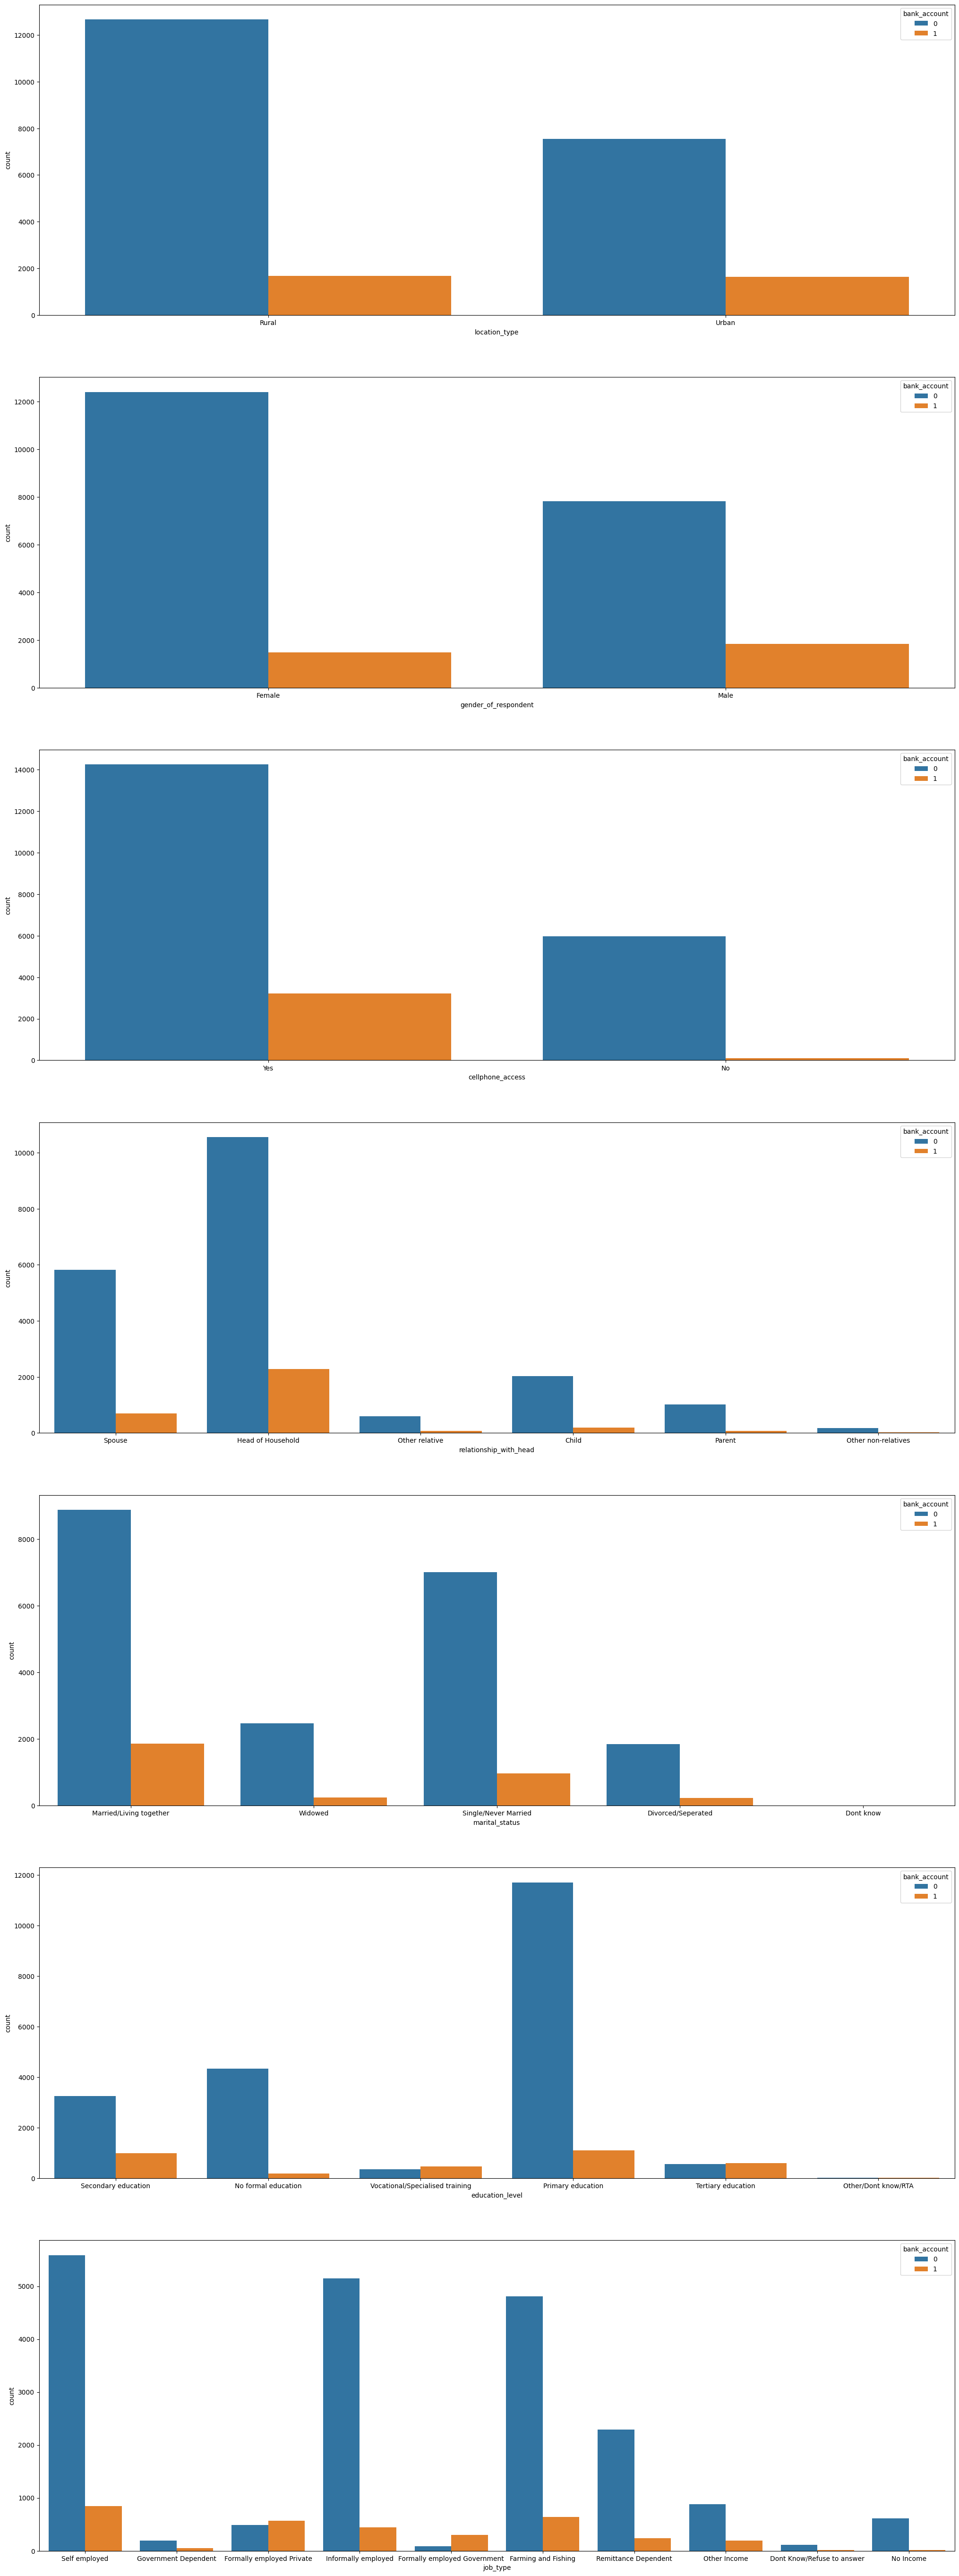

In [87]:
#data visualisation
import seaborn as sns
f ,axes = plt.subplots(7,1,figsize=[25,70])

sns.countplot(x='location_type', hue='bank_account', data=train_data,ax=axes[0])
sns.countplot(x='gender_of_respondent', hue='bank_account', data=train_data,ax=axes[1])
sns.countplot(x='cellphone_access', hue='bank_account', data=train_data,ax=axes[2])
sns.countplot(x='relationship_with_head', hue='bank_account', data=train_data,ax=axes[3])
sns.countplot(x='marital_status', hue='bank_account', data=train_data,ax=axes[4])
sns.countplot(x='education_level', hue='bank_account', data=train_data,ax=axes[5])
sns.countplot(x='job_type', hue='bank_account', data=train_data,ax=axes[6])


In [88]:
train_data['year_'] = train_data['year'] 
test_data['year_'] = test_data['year'] 
#convert yo numrical lable from float
float_array = train_data [['household_size','age_of_respondent','year_']] .values.astype(float)
float_array = test_data [['household_size','age_of_respondent','year_']] .values.astype(float)

In [89]:
train_data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,country_,year_
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Kenya,2018
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Kenya,2018
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Kenya,2018
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,Kenya,2018
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,Kenya,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,Uganda,2018
23520,Uganda,2018,uniqueid_2114,0,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income,Uganda,2018
23521,Uganda,2018,uniqueid_2115,0,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,Uganda,2018
23522,Uganda,2018,uniqueid_2116,0,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed,Uganda,2018


In [90]:
#Data preprocessing 
train_data['country_'] = train_data['country'] 
test_data['country_'] = test_data['country'] 

categ =['relationship_with_head','marital_status','education_level','job_type','country_']
# incoding conversion
train_data = pd.get_dummies(train_data, prefix_sep='_',columns=categ)

test_data = pd.get_dummies(test_data, prefix_sep='_',columns=categ)

#label Encoding 
train_data['location_type'] = le.fit_transform(train_data['location_type'])
train_data['cellphone_access'] = le.fit_transform(train_data['cellphone_access'])
train_data['gender_of_respondent'] = le.fit_transform(train_data['gender_of_respondent'])

test_data['location_type'] = le.fit_transform(test_data['location_type'])
test_data['cellphone_access'] = le.fit_transform(test_data['cellphone_access'])
test_data['gender_of_respondent'] = le.fit_transform(test_data['gender_of_respondent'])

train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,2018,...,0,0,0,0,0,1,1,0,0,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,2018,...,1,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,2018,...,0,0,0,0,0,1,1,0,0,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,2018,...,0,0,0,0,0,0,1,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,2018,...,0,1,0,0,0,0,1,0,0,0


In [91]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_6056,1,1,3,30,1,2018,0,...,0,0,0,0,0,0,1,0,0,0
1,Kenya,2018,uniqueid_6060,1,1,7,51,1,2018,0,...,0,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_6065,0,0,3,77,0,2018,0,...,0,0,0,0,1,0,1,0,0,0
3,Kenya,2018,uniqueid_6072,0,0,6,39,0,2018,0,...,0,0,0,0,1,0,1,0,0,0
4,Kenya,2018,uniqueid_6073,1,0,3,16,1,2018,1,...,0,0,0,0,1,0,1,0,0,0


In [96]:

# فصل الميزات والهدف في بيانات التدريب
X_train = train_data.drop(columns=['year', 'uniqueid', 'bank_account','country'],axis=1)
y_train = train_data['bank_account']

# معالجة بيانات الاختبار بنفس الطريقة
X_test = test_data.drop(columns=['year', 'uniqueid','country'],axis=1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaler= scaler.fit_transform(X_train)
X_test_scaler= scaler.fit_transform(X_test)


In [97]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,2018,...,0,0,0,0,0,1,1,0,0,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,2018,...,1,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,2018,...,0,0,0,0,0,1,1,0,0,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,2018,...,0,0,0,0,0,0,1,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,2018,...,0,1,0,0,0,0,1,0,0,0


In [99]:
X_train_scaler.shape

(23524, 37)

In [106]:
y_train.shape

(23524,)

In [102]:
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(X_train_scaler, y_train,stratify = y_train, test_size=0.2, random_state=42)

In [118]:
from xgboost import XGBClassifier

my_model = XGBClassifier()

from sklearn.model_selection import GridSearchCV

param_grid = {'min_child_weight':[1,5,10],
              'gamma' :[0.5,1,1.5,2,5],
              'subsample':[0.6,0.8,1.0],
             'colsample_bytree': [0.6, 0.8 ,1.0],
              'max_depth': [3, 4 ,5]
              
}
my_model2 = GridSearchCV(my_model,param_grid)
my_model2.fit(X_Train,y_Train)
print(my_model2.best_params_)



{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}


In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score

my_model3 = XGBClassifier(min_child_weight =5 ,gamma= 0.5, subsample =0.6, closample_bytree = 0.6, max_depth=5 )
my_model3.fit(X_Train,y_Train)

y_pred = my_model3.predict(X_val)
print("Error rate of random forest classifier : ",1 - accuracy_score(y_val,y_pred))

confusion_matrix(y_pred,y_val)



C:\Users\bara7\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [16:01:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "closample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


Error rate of random forest classifier :  0.11477151965993626


array([[3912,  409],
       [ 131,  253]], dtype=int64)

In [124]:
#get predect data 
test_data['bank_account'] =  my_model3.predict(X_test_scaler)

In [130]:
sumbmission_df3 = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],
"bank_account": test_data.bank_account})

In [133]:
sumbmission_df3.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [135]:
sumbmission_df3.to_csv('SubFile.csv',index=False )

In [137]:
from IPython.display import FileLink
FileLink('SubFile.csv')

C:\Users\bara7\Desktop\Finiathal\SubFile.csv